In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import math
import scipy.stats as stats

#display graphics
from IPython.display import Image








## Getting fimilar with the data

In [2]:
#load data
df= pd.read_csv('data/kc_house_data.csv')
#return first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#return shape(row,columns) 
df.shape

(21597, 21)

In [4]:
#return columns
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
#return info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<b>Observations</b>

-21597 rows of data with 21 different features<br>
-sqft_basement is a object type


# Catergorical features

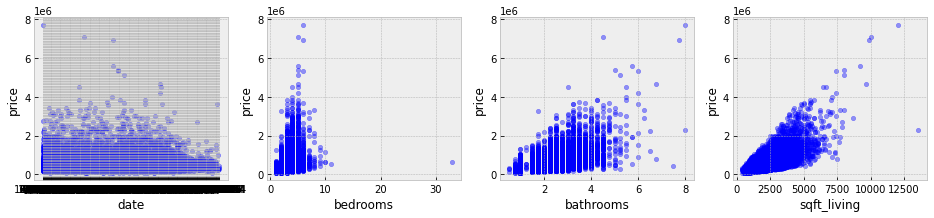

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['date', 'bedrooms', 'bathrooms','sqft_living',], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

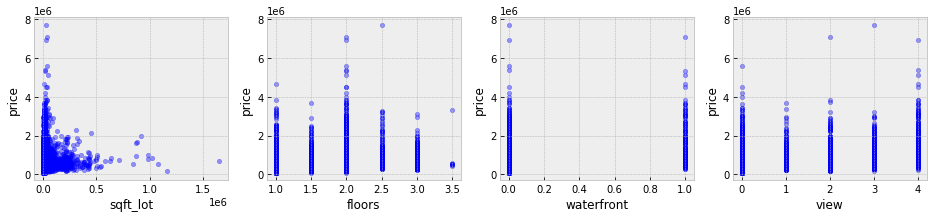

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot', 'floors', 'waterfront', 'view'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

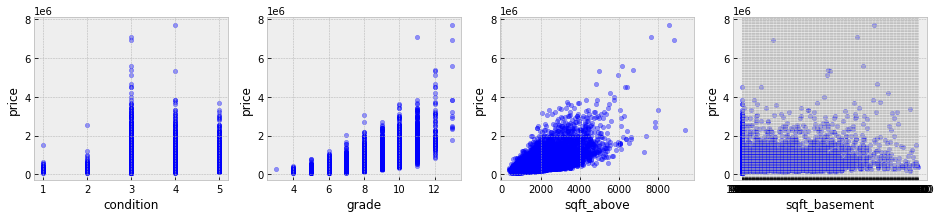

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['condition', 'grade','sqft_above', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

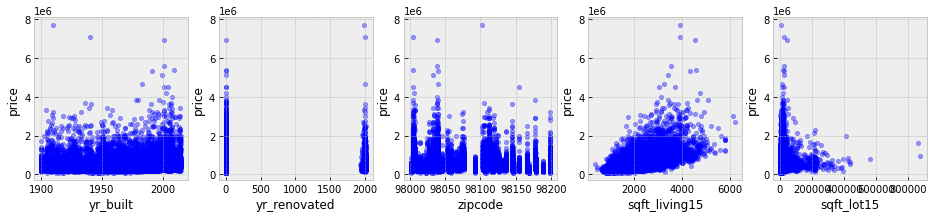

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

<b>Synopsis</b>
Features that are catergorical:
- Date
- bedroom
- bathroom
- floors
- waterfront
- view
- condition
- grade
- yr_built
- yr_renovated
- zipcode

## Data Cleaning - Dealing with nulls

In [10]:
#Dataframe of entries with at least 1 null value
df.loc[df.isnull().any(axis=1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,7,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21583,7202300110,9/15/2014,810000.0,4,3.00,3990,7838,2.0,0.0,0.0,...,9,3990,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,...,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,...,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,0.0,NaN,...,9,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023


In [11]:
#Total number of nulls for each feature
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#percentage of missing data in each column
round(df.isnull().sum()/df.shape[0],3)

id               0.000
date             0.000
price            0.000
bedrooms         0.000
bathrooms        0.000
sqft_living      0.000
sqft_lot         0.000
floors           0.000
waterfront       0.110
view             0.003
condition        0.000
grade            0.000
sqft_above       0.000
sqft_basement    0.000
yr_built         0.000
yr_renovated     0.178
zipcode          0.000
lat              0.000
long             0.000
sqft_living15    0.000
sqft_lot15       0.000
dtype: float64

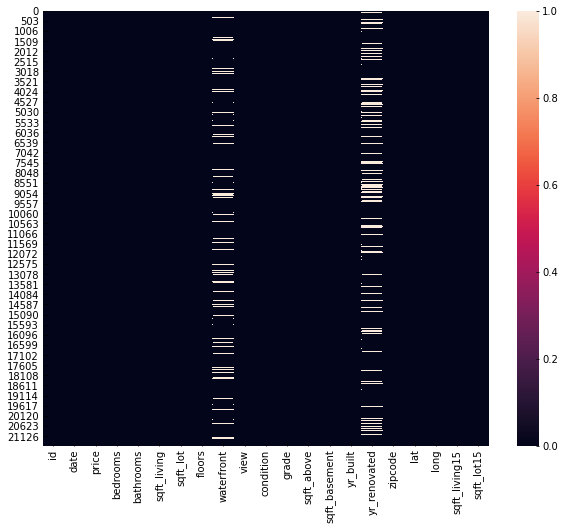

In [13]:
#visual heatmap of missing data
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

<b>Synopsis</b>

-5835 rows of data have at least 1 feature with null values

-3 features contain missing data<br>

    -waterfront : 11% missing
    -view : 0.003% missing
    -yr_renovated : 17.8% missing


## Data Cleaning - Check for duplicates

In [14]:
#Checking for duplicate ID
df[df.duplicated(['id'],keep= False)].sort_values(by='id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/2014,260000.0,2,1.00,700,4800,1.0,0.0,0.0,...,7,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,0.0,0.0,...,7,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
15185,9834200305,7/16/2014,350000.0,3,1.00,1790,3876,1.5,0.0,0.0,...,7,1090,?,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,7/17/2014,360000.0,4,2.50,2080,4080,1.0,0.0,0.0,...,7,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


In [15]:
#assigning a variable to the duplicate df
dup_id = df[df.duplicated(['id'],keep= False)].sort_values(by='id')

In [16]:
#create new df grouped by ID and put price into a list
dup_price = dup_id.groupby('id')['price'].apply(list).reset_index(name='price')

In [17]:
#abs of difference of price 
dup_price.price.apply(lambda x: abs(x[0] - x[1]))

0       20000.0
1       25000.0
2        5000.0
3       96900.0
4      133000.0
         ...   
171    127000.0
172     40000.0
173    170000.0
174    265000.0
175    190000.0
Name: price, Length: 176, dtype: float64

In [18]:
#assuming homes were always sold for a higher price, whats the average profit
dup_price.price.apply(lambda x: abs(x[0] - x[1])).mean()

137500.57386363635

In [19]:
df[df.id == 1000102]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,280000.0,6,3.0,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,4/22/2015,300000.0,6,3.0,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316


<b>Synopsis</b>

From looking at the duplicated IDs we can confidently assume ID is linked to a specific home and each row is a different sale. We can also assume that majority of these homes were purchased then sold for a higher price later on.

176 duplicated IDs

# Data Cleaning - Uninterpretable values

In [20]:
# #prints out unique values of each feature
# col = list(df.columns)

# for col in df:
#     print(f'Column : {col}')
#     print(df[col].value_counts())

In [21]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
374.0         1
792.0         1
518.0         1
2360.0        1
556.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [22]:
df[df.sqft_basement =="?"]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


<b>Synopsis</b>

creating a For loop to return the unique values for each feature. I understand that its very easy to miss key info this way but its just a quick way to see if i can spot any values that seem out of place. Due to our early discover ( df.describe ) I was able to find out that the feature sqft_basement was an Object type. Typically square footage should be diplayed as int just like the other feature in the dataset. So I assumed that there were special characters that may have changed the Dtype of the feature. During the feature analysis I will look into the unique values of each column more.  

<b>?</b>

At this stage its very diffcult to understand what "?" could represent under we dive deeper into this feature. 

## Target Variable - Price
sold price of house

In [23]:
#sorting prices from lowest to highest
df.price.sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64

In [24]:
#cheapest home
df[df.price == df.price.min()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.0,780,16344,1.0,0.0,0.0,...,5,780,0.0,1942,NaN,98168,47.4739,-122.28,1700,10387


In [25]:
#most expensive home
df[df.price == df.price.max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800


In [26]:
#range of the house prices
df.price.max() - df.price.min() 

7622000.0

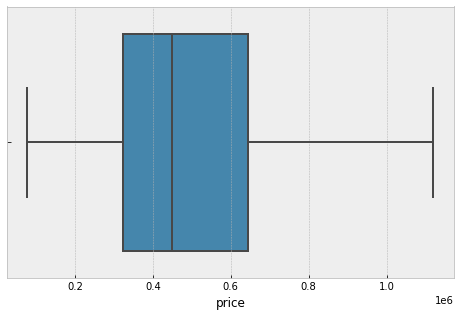

In [27]:
#Boxplot of price w/o outliers
plt.figure(figsize=(8,5))
sns.boxplot(df.price,showfliers=False);

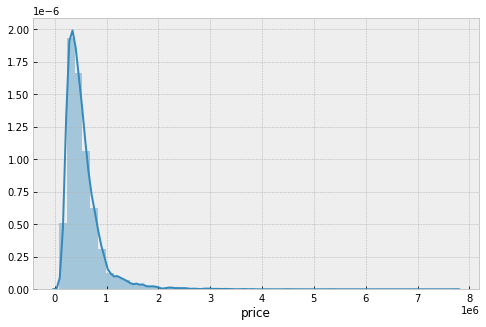

In [28]:
#check distribution of prices
plt.figure(figsize=(8,5))
sns.distplot(df.price);

<b>Observations</b>

- The difference between the cheapest house and most expensive house is over $$7million dollars
- majority of the prices fall within the median of $450K according to the boxplot
- Prices is not normally distributed
- outliers on the expensive end


# Data Cleaning - Removing Outliers

In [29]:
q99 = df.loc[df.price > df.price.quantile(.99)]

In [30]:
q01 = df.loc[df.price < df.price.quantile(.01)]

In [31]:
df = pd.concat([df,q01,q99]).drop_duplicates(keep=False)

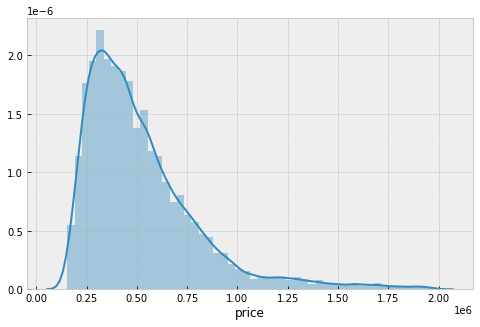

In [32]:
#check distribution of prices
plt.figure(figsize=(8,5))
sns.distplot(df.price);

# Feature Cleaning - Waterfront (Catergorical)
House which has a view to a waterfront

## What is a waterfront property?

The definition of waterfront is land or a dock area that is located directly on a body of water such as a river, lake or ocean. A house directly on the beach of the Atlantic Ocean is an example of a waterfront house.

-https://www.yourdictionary.com/waterfront


Can assume if there is a null value we can impute a 0.0 meaning there is no waterfront???

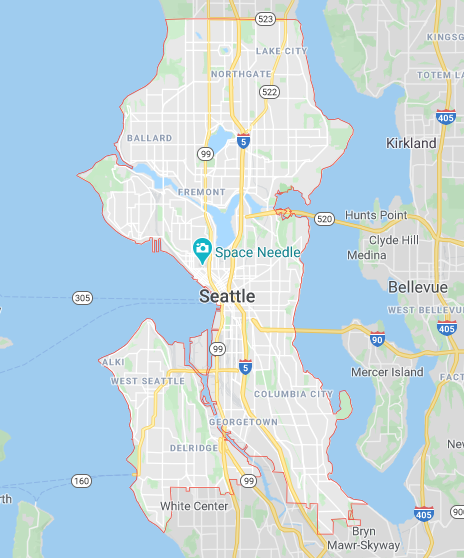

In [33]:
Image(filename='images/kings_county.png') 

In [34]:
#unique values of waterfront properties
list(df.waterfront.unique())

[nan, 0.0, 1.0]

In [35]:
#value count of waterfront properties
df.waterfront.value_counts(dropna=False)

0.0    18737
NaN     2330
1.0      101
Name: waterfront, dtype: int64

In [36]:
#dataframe of properties with null waterfront values
null_wf = df.loc[df.waterfront.isnull()]

#dataframe of property with a waterfront view
yes_wf = df.loc[df.waterfront == 1.0]

#dataframe of property without waterfront view
no_wf = df.loc[df.waterfront == 0.0]


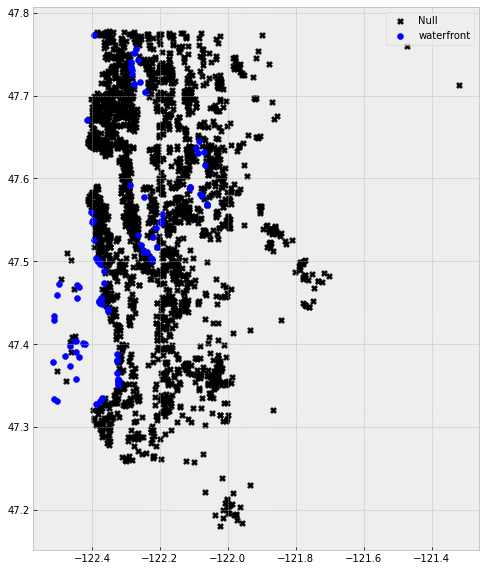

In [37]:
#Scatterplot of null and wf properties by lat and long
plt.figure(figsize=(8,10))
plt.scatter(null_wf.long,null_wf.lat, c='black',marker='X',label='Null')
plt.scatter(yes_wf.long,yes_wf.lat, c='blue',label='waterfront')
plt.legend()

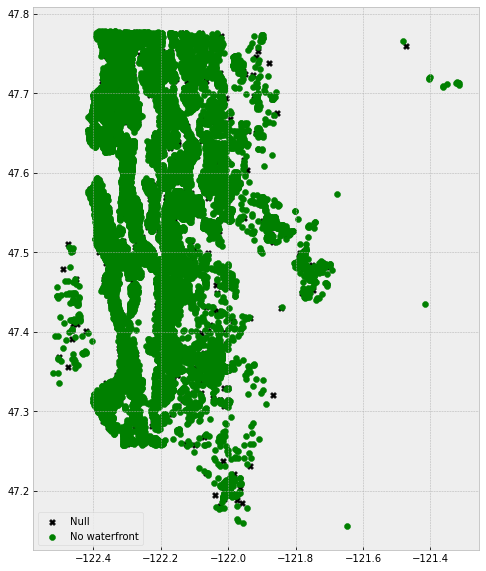

In [38]:
#Scatterplot of null and non waterfront properties but lat and long
plt.figure(figsize=(8,10))
plt.scatter(null_wf.long,null_wf.lat, c='black',marker='X',label='Null')
plt.scatter(no_wf.long,no_wf.lat, c='green',label='No waterfront')
plt.legend()

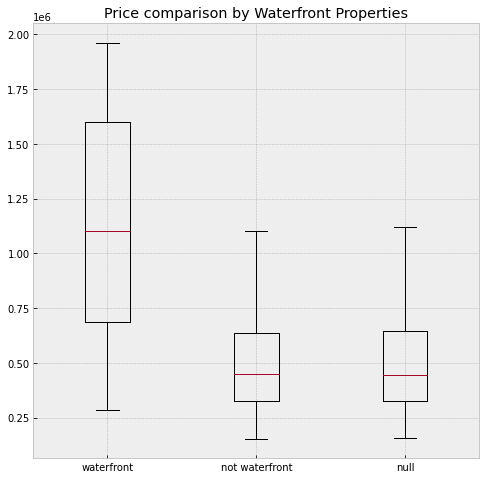

In [39]:
#multi-dimensional array groupedby by waterfront feature
wf_prices=np.array([df.price[df['waterfront'] == 1.0],df.price[df['waterfront'] == 0.0],df.price[df['waterfront'].isna()]],dtype=object)

#boxplot comparison of waterfront properties
plt.figure(figsize=(8,8))
plt.boxplot(wf_prices, labels=['waterfront', 'not waterfront','null'], showfliers=False,);
plt.title("Price comparison by Waterfront Properties");

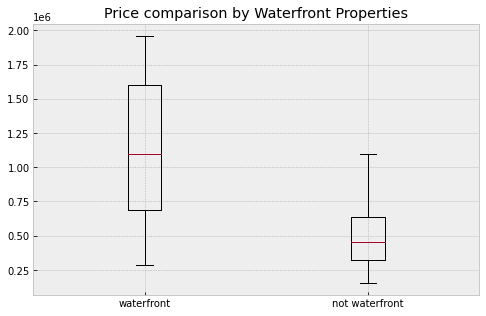

In [40]:
#multi-dimensional array groupedby by waterfront feature
wf_prices=np.array([df.price[df['waterfront'] == 1.0],df.price[(df['waterfront'] == 0.0) ]],dtype=object)

#boxplot comparison of waterfront properties
plt.figure(figsize=(8,5))
plt.boxplot(wf_prices, labels=['waterfront', 'not waterfront'], showfliers=False,);
plt.title("Price comparison by Waterfront Properties");

<b>Synopsis</b>
    
<b>ScatterPlot</b><br>
Plotting each point by their coordinates(lat,long) gives a visual of where these properties are. Comparing them to their to their counterparts we can visually see that major of the properties are not near bodies of water.

<b>BoxPlot</b><br>
Basing the properties by price we can see a similarity between null and non-waterfront properties

Decision : Impute all null values to 0.0


In [41]:
#impute null waterfront values with 0.0
df.waterfront.fillna(0.0,inplace=True)

In [42]:
#Creating a new column for waterfront properties
df["wf_property"]=pd.get_dummies(df.waterfront,drop_first=True)

In [43]:
#drop orginal feature (waterfront)
df = df.drop(['waterfront'],axis=1)

In [44]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,wf_property
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,3,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0


# View (Catergorical)
Has been viewed

In [45]:
df.view.isna().sum()

61

In [46]:
#returning unique values 
list(df.view.unique())

[0.0, nan, 3.0, 2.0, 4.0, 1.0]

In [47]:
#value counts
df.view.value_counts(dropna=False)

0.0    19133
2.0      927
3.0      481
1.0      317
4.0      249
NaN       61
Name: view, dtype: int64

Values of this feature is very ambiguous
- how many times the properties was viewed by buyer?
- how many different potential buyers viewed the house?
- etc
<br>

because of the ambiguity and only 63 null values we can impute the null values with the mode.

In [48]:
#impute null view values with 0.0
df.view.fillna(0.0, inplace=True)

In [49]:
df.view.value_counts()

0.0    19194
2.0      927
3.0      481
1.0      317
4.0      249
Name: view, dtype: int64

# Yr_renovated (Catergorical)
Year when house was renovated

In [50]:
#unique values
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [51]:
#value counts
df.yr_renovated.value_counts(dropna=False)

0.0       16699
NaN        3757
2014.0       73
2013.0       30
2000.0       29
          ...  
1953.0        1
1934.0        1
1948.0        1
1946.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

<b>Approach</b>

Create a new feature called 'Renovated' that consist of 0.0(never been renovated) and 1.0(been renovated)
then dropping yr_renovated feature

In [52]:
df['renovated'] = df.yr_renovated.apply(lambda x: 1 if x > 0.0 else 0)

In [53]:
#drop yr_renovated feature
df.drop(columns='yr_renovated', inplace=True)

In [54]:
#create dummy values
renovated = pd.get_dummies(df.renovated, prefix="renovated",drop_first=True)

In [55]:
df = pd.concat([df,renovated],axis=1)

In [56]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,wf_property,renovated,renovated_1
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,0.0,1955,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,400.0,1951,98125,47.7210,-122.319,1690,7639,0,1,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,0.0,1933,98028,47.7379,-122.233,2720,8062,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,910.0,1965,98136,47.5208,-122.393,1360,5000,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,0.0,1987,98074,47.6168,-122.045,1800,7503,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3,...,0.0,2009,98103,47.6993,-122.346,1530,1509,0,0,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3,...,0.0,2014,98146,47.5107,-122.362,1830,7200,0,0,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3,...,0.0,2009,98144,47.5944,-122.299,1020,2007,0,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,3,...,0.0,2004,98027,47.5345,-122.069,1410,1287,0,0,0


# Sqft_basement
square footage of the basement

In [57]:
df.sqft_basement.value_counts()

0.0       12575
?           441
600.0       215
500.0       209
700.0       205
          ...  
2200.0        1
1770.0        1
2600.0        1
295.0         1
556.0         1
Name: sqft_basement, Length: 291, dtype: int64

In [58]:
df[df.sqft_basement == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,wf_property,renovated,renovated_1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,...,?,1995,98003,47.3097,-122.327,2238,6819,0,0,0
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,4,...,?,1921,98002,47.3089,-122.210,1060,5095,0,0,0
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,3,...,?,2014,98053,47.6848,-122.016,3625,5639,0,0,0
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,3,...,?,2002,98010,47.3420,-122.025,3350,39750,0,0,0
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,4,...,?,1980,98038,47.3624,-122.031,1540,11656,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,3,...,?,2008,98103,47.6931,-122.330,2180,5009,0,0,0
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,3,...,?,2013,98042,47.3590,-122.081,2300,3836,0,0,0
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,3,...,?,2008,98117,47.6844,-122.387,980,1023,0,0,0
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,3,...,?,2010,98023,47.2815,-122.356,2380,5396,0,0,0


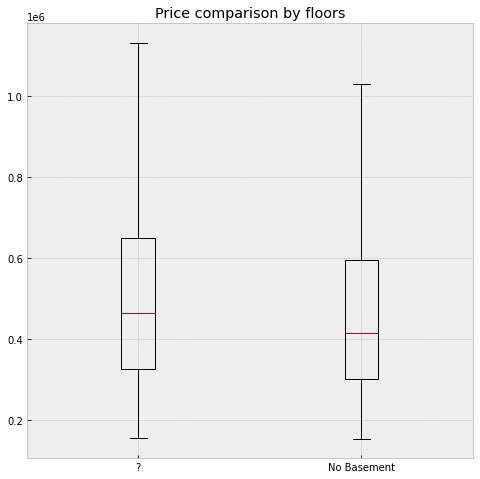

In [59]:
basement_price = []
basement_price.append(df[df['sqft_basement']=='?']['price'])
basement_price.append(df[df['sqft_basement']== "0.0"]['price'])

basement_price = np.array(basement_price,dtype=object)

plt.figure(figsize=(8,8))
plt.boxplot(basement_price,labels=['?',"No Basement"],showfliers=False)
plt.title('Price comparison by floors');

<b>Synopsis</b>
    
<b>Assumption</b><br>
"?" could mean that there weren't basement or there was a basement but it was just diffcult to measure the size of.

<b>Approach</b><br>
After ploting the prices of homes without a basement to the ones with "?"s I will be replacing ?s to 0.0 and assume they dont have a basement.

In [60]:
#replaceing all ?s to 0.0 in sqft_basement feature
df['sqft_basement']=df.sqft_basement.apply(lambda x: "0.0" if x == "?" else x)

In [61]:
#changeing the Dtype from object to int64
df['sqft_basement'] = df.sqft_basement.astype('float64')

# Date|
date house was sold

In [62]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21168, dtype: object

In [63]:
df.date.apply(lambda x: x[-4:]).value_counts(dropna=False)

2014    14335
2015     6833
Name: date, dtype: int64

This data set consisted of properties that were sold in a 2 year span(2014-2015)

# Bedrooms
number of bedrooms

In [64]:
#unique values
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [65]:
#value count
df.bedrooms.value_counts()

3     9699
4     6778
2     2663
5     1539
6      259
1      175
7       33
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

There are property with 10,11,33 bedrooms. Which is not typical in most houses so we will investigate these datapoints further to determine what we should do with this datapoint

In [66]:
df.loc[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,wf_property,renovated,renovated_1
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,5,...,580.0,1947,98103,47.6878,-122.331,1330,4700,0,0,0


In [67]:
df.loc[df.bedrooms == 11]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,wf_property,renovated,renovated_1
8748,1773100755,8/21/2014,520000.0,11,3.0,3000,4960,2.0,0.0,3,...,600.0,1918,98106,47.556,-122.363,1420,4960,0,1,1


<b>Synopsis</b>

Both datapoint looks like they were typos, after looking at the coordinates, the house seem to be about average size to all the other homes in that neighborhood and its highl unlikely to fit 33 bedrooms in a house that size. same with the house iwth 11 bedroom. We would be dropping both the data point



In [68]:
#drop 2 rows of data with the assumption that a feature has a typo
df.drop(index=[15856,8748],inplace=True)

# Bathroom 
Number of Bathrooms/bedroom

In [69]:
#unique values
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 4.25, 3.75, 5.  , 1.25, 0.5 , 5.5 , 5.25, 6.75,
       5.75, 7.5 , 6.5 , 6.  ])

In [70]:
df.bathrooms.value_counts()

2.50    5357
1.00    3671
1.75    3037
2.25    2041
2.00    1925
1.50    1434
2.75    1180
3.00     734
3.50     710
3.25     555
3.75     141
4.00     115
4.50      87
0.75      61
4.25      59
5.00      16
4.75      10
1.25       9
5.25       9
5.50       4
5.75       3
0.50       3
6.00       2
7.50       1
6.75       1
6.50       1
Name: bathrooms, dtype: int64

<b>Synopsis</b>


Just like the feature before(Viewed) the values of bathrooms is also hard to interpret because they are floats.<br>
My approach to decoding theses values: <br>
As you can see the values seem to be in intervals of .25. So a .25 could mean there is just a toilet, .50 could be a toilet and a sink, .75 is the former and a shower. and the ones that are whole numbers are full bathrooms

But its very hard to interpret which is which.

# Sqft_living
footage of home

In [71]:
#ascending order of sqft_living 
df.sqft_living.sort_values()

15367     370
860       380
21316     390
8614      410
11488     420
         ... 
2711     7350
11859    7420
4020     7480
14019    7620
16759    7730
Name: sqft_living, Length: 21166, dtype: int64

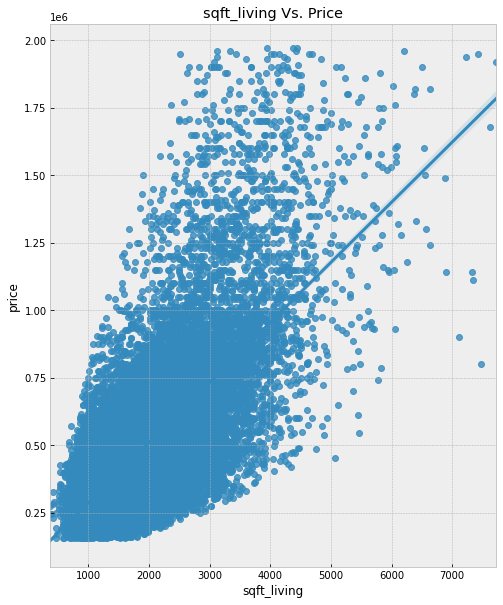

In [72]:
plt.figure(figsize=(8,10))
sns.regplot(x='sqft_living',y='price',data=df)
plt.title("sqft_living Vs. Price");

In [73]:
#entry of largest sqft_living property
df[df.sqft_living == df.sqft_living.max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,wf_property,renovated,renovated_1
16759,1630700380,1/30/2015,1920000.0,5,5.75,7730,230868,2.0,0.0,3,...,1070.0,2004,98077,47.7615,-122.084,2660,39292,0,0,0


<b>Synopsis</b>

It seems obvious that the larger the area, interms of properties atleast, the more monetary value the property has. Looking at the regression plot we see a point that is far left of the X axis(larger sqft_living) but not so high in price. The value doesnt seem to be a typo so we will be keeping this datapoint, its possible that the other features could have brought the value down.

# Sqft_lot
Footage of lot

In [74]:
#ascending order of sqft_living 
df.sqft_lot.sort_values()

15729        520
5821         572
7582         600
3449         609
20588        635
          ...   
3945      982998
7762     1024068
7640     1074218
17305    1164794
1717     1651359
Name: sqft_lot, Length: 21166, dtype: int64

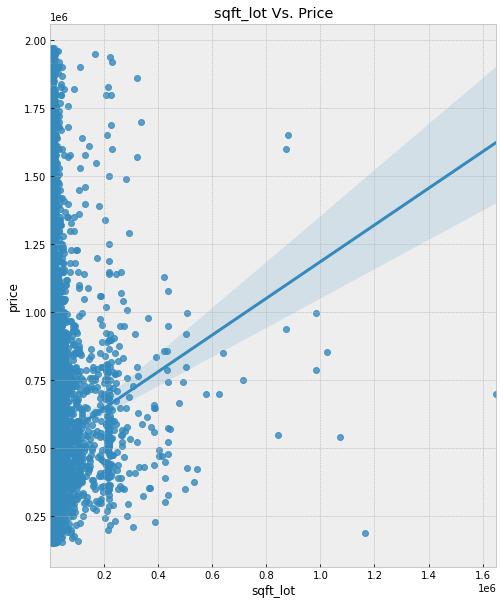

In [75]:
plt.figure(figsize=(8,10))
sns.regplot(x='sqft_lot',y='price',data=df)
plt.title("sqft_lot Vs. Price");

In [76]:
##entry of property with largest lot
df[df.sqft_lot == df.sqft_lot.max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,wf_property,renovated,renovated_1
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,3.0,4,...,0.0,1920,98022,47.2313,-122.023,2560,425581,0,0,0


<b>Synopsis</b>

Similar to the previous feature we see a point where its by far the largest property base on lot size but it doesnt reflect in price. A visual explaination of a property that is almost 20million square foot is 21 football fields(According to Quora). The only possible way I could imagine a property this big is if its a farm
<img src="images/KCfarmsandforest.png" width="500"/>![](KCfarmsandforest.png)
Kings county WA has ~ 1,800 farms according to their website<br>

After looking up the coordinates we confirm that this is indeed a farm
<img src="images/Farm.png" width="500">![](Farm.png)

Because this project is focused on homes I will be removing this property from the dataset.

In [77]:
#drop farm land data point
df.drop(index=1717, inplace=True)

# Floor (Catergorical)
Floors(levels) in house

In [78]:
#unique values
list(df.floors.unique())

[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]

In [79]:
#value counts
df.floors.value_counts()

1.0    10441
2.0     8087
1.5     1883
3.0      606
2.5      142
3.5        6
Name: floors, dtype: int64

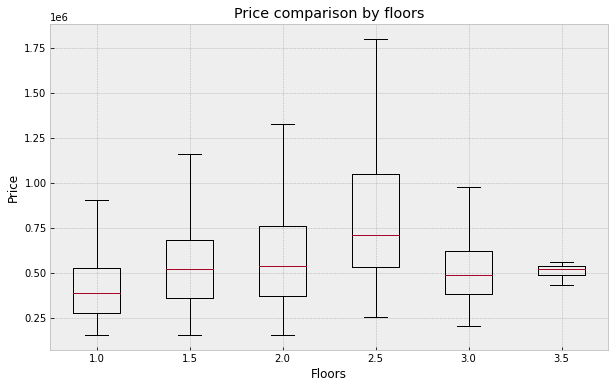

In [80]:
floor_prices = []
floor_prices.append(df[df['floors']==1.0]['price'])
floor_prices.append(df[df['floors']==1.5]['price'])
floor_prices.append(df[df['floors']==2.0]['price'])
floor_prices.append(df[df['floors']==2.5]['price'])
floor_prices.append(df[df['floors']==3.0]['price'])
floor_prices.append(df[df['floors']==3.5]['price'])

floor_prices = np.array(floor_prices,dtype=object)

plt.figure(figsize=(10,6))
plt.boxplot(floor_prices,labels=['1.0','1.5','2.0','2.5','3.0',"3.5"],showfliers=False)
plt.title('Price comparison by floors')
plt.xlabel('Floors')
plt.ylabel('Price');

In [81]:
#apply a function to cast all values in floors to an int (and .5 value will be rounded up)
df['floors'] = df.floors.apply(lambda x: math.ceil(x))

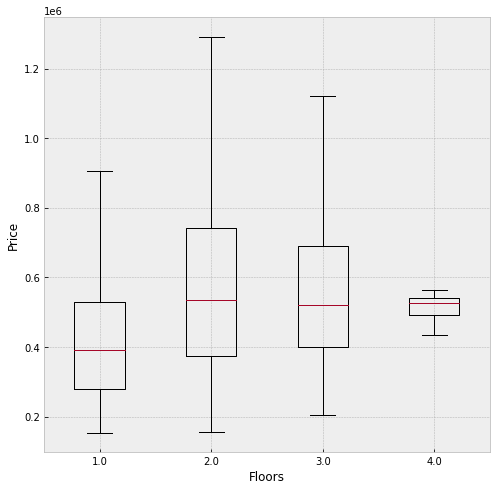

In [82]:
#Replot the box plot 
floor_prices = []
floor_prices.append(df[df['floors']==1.0]['price'])
floor_prices.append(df[df['floors']==2.0]['price'])
floor_prices.append(df[df['floors']==3.0]['price'])
floor_prices.append(df[df['floors']==4.0]['price'])

floor_prices = np.array(floor_prices,dtype=object)

plt.figure(figsize=(8,8))
plt.boxplot(floor_prices,labels=['1.0','2.0','3.0','4.0'],showfliers=False)
# plt.title('Price comparison by floors')
plt.xlabel('Floors')
plt.ylabel('Price');

In [83]:
#One hot encoding for floors
floors = pd.get_dummies(df.floors,drop_first=True, prefix='floors')
df = pd.concat([df,floors], axis=1)

<b>Synopsis</b>

Theres a gradual increase as there are more floors but then a dropoff in price from 2.5 to 3.0 floors.<br>

Seattle, especially middle Kings County, is right on top of a fault line aka The Seattle Fault,
This area is prone to earthquakes so taller houses are highly discouraged. This could be the reason why there is a drop off"

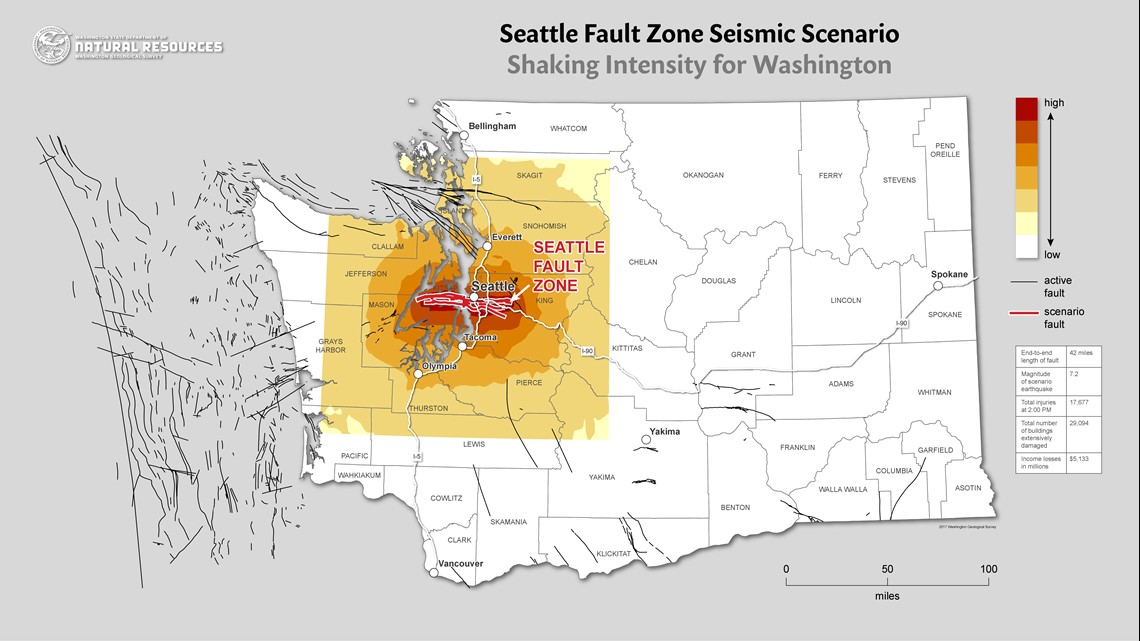

<img src="attachment:Seattle_fault_zone.jpg" width="800">

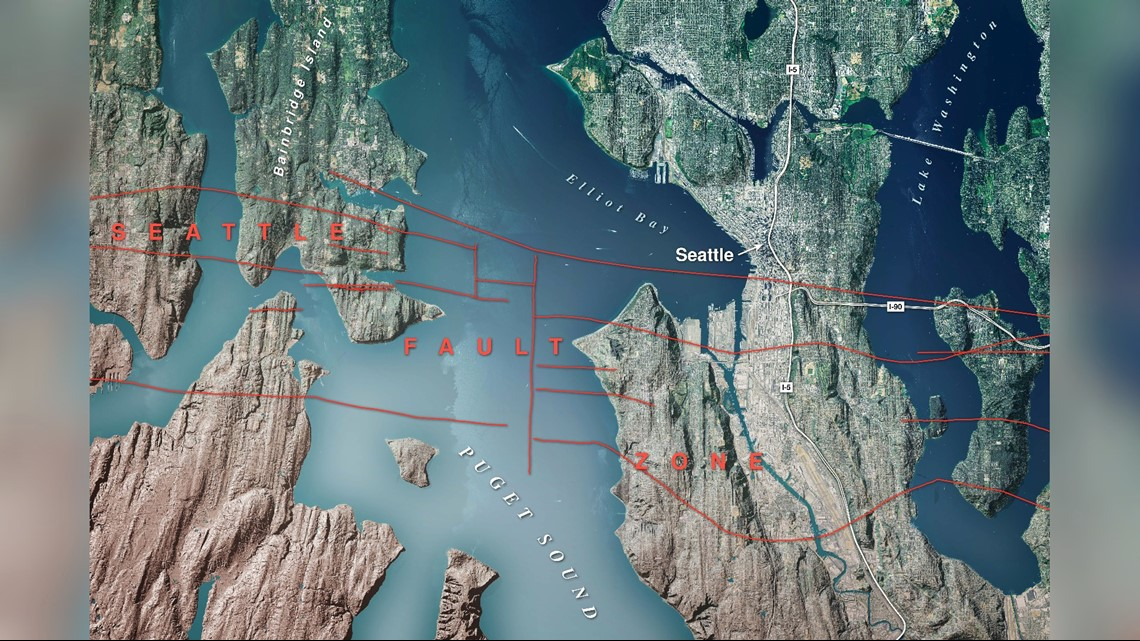

Keep in mind that the prices are for what they are sold for not how much the house cost to build. Its a no brainer that a house with more floors will cost more to build due to requiring more material, labor, etc. The dataset is of properties prices that were sold, it can be interpreted that buyers tend to be more cautious when buying homes with more floors due to the fact that Kings County is very earthquake prone.

In [84]:
df.drop(['floors'],axis=1,inplace=True)

# Condition (Catergorical)
How good the condition is ( Overall)

In [85]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [86]:
df.condition.value_counts()

3    13753
4     5576
5     1661
2      153
1       22
Name: condition, dtype: int64

In [87]:
condition = pd.get_dummies(df.condition,drop_first=True, prefix='Condition')
df = pd.concat([df,condition], axis=1)


In [88]:
df.drop(['condition'],axis=1,inplace=True)

# Grade (Catergorical)
Overall grade given to the housing unit, based on KC grading system

In [89]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10,  4, 12,  3, 13])

In [90]:
df.grade.value_counts()

7     8921
8     6057
9     2595
6     1931
10    1070
11     324
5      196
12      53
4       16
13       1
3        1
Name: grade, dtype: int64

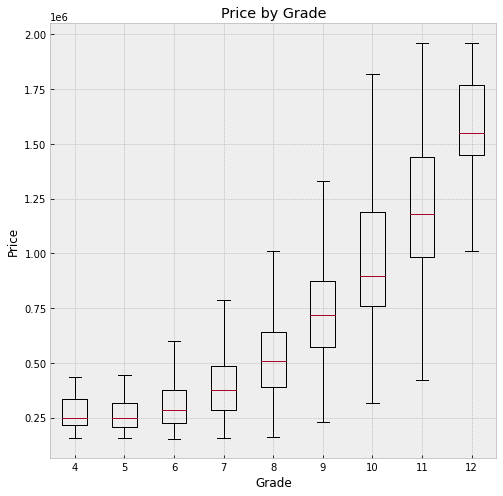

In [91]:
#Replot the box plot 
grade_prices = []
grade_prices.append(df[df['grade']==4]['price'])
grade_prices.append(df[df['grade']==5]['price'])
grade_prices.append(df[df['grade']==6]['price'])
grade_prices.append(df[df['grade']==7]['price'])
grade_prices.append(df[df['grade']==8]['price'])
grade_prices.append(df[df['grade']==9]['price'])
grade_prices.append(df[df['grade']==10]['price'])
grade_prices.append(df[df['grade']==11]['price'])
grade_prices.append(df[df['grade']==12]['price'])
# grade_prices.append(df[df['grade']==13]['price'])


grade_prices = np.array(grade_prices,dtype=object)

plt.figure(figsize=(8,8))
plt.boxplot(grade_prices,labels=[4,5,6,7,8,9,10,11,12],showfliers=False)
plt.title("Price by Grade")
plt.xlabel('Grade')
plt.ylabel('Price');

In [92]:
df[df['grade']==13]['price']

5446    1780000.0
Name: price, dtype: float64

In [93]:
grade = pd.get_dummies(df.grade,drop_first=True, prefix='grade')
df = pd.concat([df,grade], axis=1)


In [94]:
df.drop(['grade'],axis=1,inplace=True)

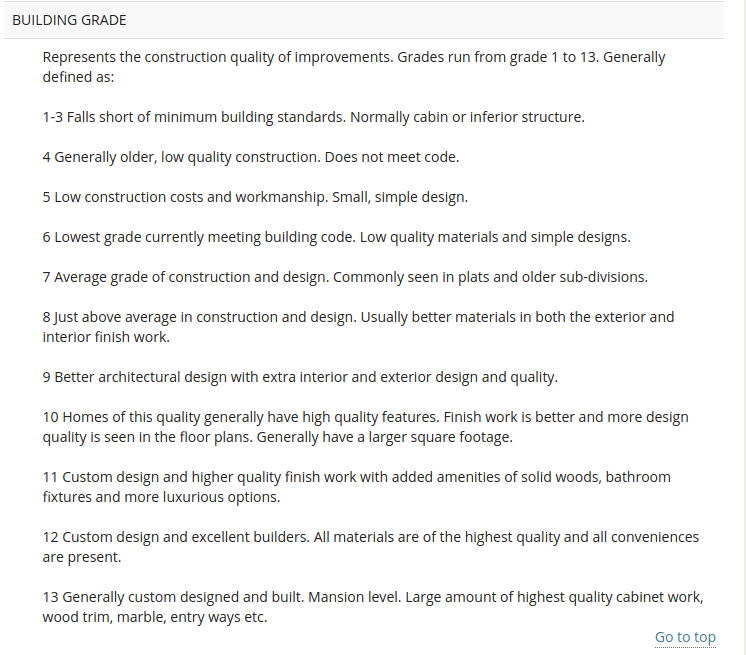

# Zipcode (Catergorical)
zip

In [95]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
       98199, 98040, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [96]:
df.zipcode.value_counts()

98103    601
98038    587
98115    582
98052    573
98117    552
        ... 
98010     99
98102     99
98024     80
98148     55
98039     29
Name: zipcode, Length: 70, dtype: int64

In [97]:
df.zipcode

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21165, dtype: int64

## EDA - Zipcode 

Kings County holds 46 spots of the top 50 most expensive zip in terms of priciest real estate in Washington according to PropertyShark. With zip 98039(Medina) being the most expensive. 98039 has a median home price of $2.4 million, this roster of home owners include Bill Gates and Jeff Bezo. 

<b>Most expensive zip codes in Washington</b>
 - 98039 / Med: \\$2.4 M
 - 98004 / Med: \\$1.279M
 - 98040 / Med: \\$1.237M
 - 98112 / Med: \\$956K
 
 Just to name a few, all of these zips have a median price of over 950,000

[Source](https://www.propertyshark.com/Real-Estate-Reports/2017/10/04/expensive-zip-codes-washington-state-medina-homes-8x-pricier-u-s-median/)

This article is from October 2017 with isnt far off from our dataset(2014-2015) so the information shouldn't be considered outdate.

In [98]:
# #load top 50 most expensive zipcodes of Washington State by median house price
# top50zip = pd.read_csv('Top_50_zips.csv')

# #extracting only zipcodes from Kings county
# kc_zip = top50zip.zipcode[top50zip.County == "King County"]

In [99]:
# #splitting zips in to groups of 5 by rankings
# top5 = list((kc_zip[0:5]))
# top6_10 = list(kc_zip[5:10])
# top11_15 = list(kc_zip[10:15])
# top16_20 = list(kc_zip[15:20])
# top21_25 = list(kc_zip[20:25])
# top26_30 = list(kc_zip[25:30])
# top31_35 = list(kc_zip[30:35])
# top36_40 = list(kc_zip[35:40])
# top41_45 = list(kc_zip[40:45])
# top46_50 = list(kc_zip[45:])
# top5, top6_10

In [100]:
# #replacing zip with their rank 
# df['rank_top5'] = df['zipcode'].replace(to_replace=top5,value='1')
# df['rank_6-10'] = df['zipcode'].replace(to_replace=top6_10,value='1')
# df['rank_11-15'] = df['zipcode'].replace(to_replace=top11_15,value='1')
# df['rank16-20'] = df['zipcode'].replace(to_replace=top16_20,value='1')
# df['rank21-25'] = df['zipcode'].replace(to_replace=top21_25,value='1')
# df['rank_26-30'] = df['zipcode'].replace(to_replace=top26_30,value='1')
# df['rank_31-35'] = df['zipcode'].replace(to_replace=top36_40,value='1')
# df['rank_36-40'] = df['zipcode'].replace(to_replace=top36_40,value='1')
# df['rank_41-45'] = df['zipcode'].replace(to_replace=top41_45,value='1')
# df['rank_46-50'] = df['zipcode'].replace(to_replace=top46_50,value='1')

In [101]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,0.0,1180,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,0.0,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,0.0,770,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,0.0,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,0.0,1680,0.0,...,0,0,0,0,1,0,0,0,0,0


In [102]:
#Creating a new column containing True/False vaule if they are in the expensive zipcodes
df['top_5_zip'] = df['zipcode'].isin([98039, 98004, 98040, 98112])

#transform True/False values to 1/0
df['top_5_zip']=df.top_5_zip.apply(lambda x: 1 if x ==True else 0)


#drop orginal zipcode feature as its no longer needed
# df = df.drop('zipcode', axis=1);

In [103]:
#Average price of homes in the top 5 zipcodes
df[df.top_5_zip == True]['price'].mean()

1073784.8938271606

In [104]:
#return rows of True value in top_5_zip column
df[df.top_5_zip == 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,sqft_above,sqft_basement,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,top_5_zip
27,3303700376,12/1/2014,667000.0,3,1.00,1400,1581,0.0,1400,0.0,...,0,0,0,1,0,0,0,0,0,1
66,3394100030,9/9/2014,975000.0,4,2.50,2720,11049,0.0,2720,0.0,...,0,0,0,0,0,1,0,0,0,1
69,1802000060,6/12/2014,1330000.0,5,2.25,3200,20158,0.0,1600,1600.0,...,0,0,0,1,0,0,0,0,0,1
95,1483300570,9/8/2014,905000.0,4,2.50,3300,10250,0.0,2390,910.0,...,0,0,1,0,0,0,0,0,0,1
103,2450000295,10/7/2014,1090000.0,3,2.50,2920,8113,0.0,2920,0.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21517,524059322,2/26/2015,999999.0,3,2.50,2100,4097,0.0,2100,0.0,...,0,0,0,0,1,0,0,0,0,1
21536,688000017,6/27/2014,516500.0,1,1.25,1100,638,0.0,1100,0.0,...,0,0,0,0,1,0,0,0,0,1
21552,524059330,1/30/2015,1700000.0,4,3.50,3830,8963,0.0,3120,710.0,...,0,0,0,0,0,1,0,0,0,1
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,0.0,3410,0.0,...,0,0,0,0,0,1,0,0,0,1


In [105]:
df= df.drop(['zipcode'],axis=1)

# Dropping Columns
Drop columns we deem no longer needed for our model

In [106]:
df = df.drop(['id','date','view','lat','long','sqft_living15','sqft_lot15'],axis=1)

In [107]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'wf_property', 'renovated',
       'renovated_1', 'floors_2', 'floors_3', 'floors_4', 'Condition_2',
       'Condition_3', 'Condition_4', 'Condition_5', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'top_5_zip'],
      dtype='object')

# OLS Model 1

In [108]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'wf_property',
       'renovated', 'Condition_2', 'Condition_3', 'Condition_4', 'Condition_5',
       'top_5_zip','floors_2','floors_3','floors_4','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1777.
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:51:33   Log-Likelihood:            -2.8326e+05
No. Observations:               21165   AIC:                         5.666e+05
Df Residuals:                   21137   BIC:                         5.668e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.308e+06    1.9e+05     27.945      0.000    4.94e+06    5.68e+06
bedrooms      -2.197e+04   1600.321    -13.730      0.000   -2.51e+04   -1.88e+04
bathrooms      3.699e+04   2599.482     14.231      0.000    3.19e+04    4.21e+04
sqft_living     105.4429     14.532      7.256      0.000      76.959     133.927
sqft_lot         -0.0426      0.028     -1.509      0.131      -0.098       0.013
sqft_above       -0.5563     14.519     -0.038      0.969     -29.014      27.902
sqft_basement    26.2985     14.415      1.824      0.068      -1.957      54.554
yr_built      -2690.1304     52.993    -50.763      0.000   -2794.002   -2586.259
wf_property    4.091e+05   1.58e+04     25.920      0.000    3.78e+05     4.4e+05
renovated      2.093e+04   6347.202      3.298      0.001    8490.641    3.34e+04
Condition_2   -3.172e+04   3.59e+04     -0.884      0.377   -1.02e+05    3.87e+04
Condition_3    1.311e+04   3.37e+04      0.389      0.697    -5.3e+04    7.92e+04
Condition_4    1.737e+04   3.37e+04      0.515      0.606   -4.87e+04    8.34e+04
Condition_5    5.893e+04   3.39e+04      1.741      0.082   -7429.168    1.25e+05
top_5_zip       3.65e+05   5800.631     62.927      0.000    3.54e+05    3.76e+05
floors_2       2.537e+04   2915.588      8.702      0.000    1.97e+04    3.11e+04
floors_3       1.134e+05   6410.619     17.695      0.000    1.01e+05    1.26e+05
floors_4       1.224e+05   6.43e+04      1.904      0.057   -3580.531    2.48e+05
grade_4        1.017e+05   1.62e+05      0.627      0.530   -2.16e+05    4.19e+05
grade_5        4.658e+04   1.58e+05      0.296      0.768   -2.62e+05    3.56e+05
grade_6        8.078e+04   1.57e+05      0.514      0.607   -2.27e+05    3.89e+05
grade_7        1.606e+05   1.57e+05      1.021      0.307   -1.48e+05    4.69e+05
grade_8        2.569e+05   1.57e+05      1.633      0.102   -5.14e+04    5.65e+05
grade_9        4.064e+05   1.57e+05      2.583      0.010     9.8e+04    7.15e+05
grade_10       5.476e+05   1.57e+05      3.478      0.001    2.39e+05    8.56e+05
grade_11       6.909e+05   1.58e+05      4.382      0.000    3.82e+05       1e+06
grade_12       9.475e+05   1.59e+05      5.960      0.000    6.36e+05    1.26e+06
grade_13        1.28e+06   2.23e+05      5.750      0.000    8.43e+05    1.72e+06
==============================================================================
Omnibus:                     3105.015   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11619.523
Skew:                           0.709   Prob(JB):                         0.00
Kurtosis:                       6.341   Cond. No.                     2.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

<b>Observations</b>
- r^2 = .694
- We have a high Cond. No which means our features contain multicollinearity
- multiple features have high p-values
- suspect that P-value is high for our engineered features because there isn't enough data points(condition_2 only has 170 rows of houses)

In [109]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'wf_property',
       'renovated', 'Condition_2', 'Condition_3', 'Condition_4', 'Condition_5',
       'top_5_zip','floors_2','floors_3','floors_4','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']]

In [110]:
X_train, x_test, Y_train, y_test = train_test_split(X, df.price, test_size = 0.3)

linreg = LinearRegression() 
model_test = linreg.fit(X_train, Y_train)

#Use model to generate predicted values on both train and test sets
y_hat_train = model_test.predict(X_train)
y_hat_test = model_test.predict(x_test)

In [111]:
train_mse = mean_squared_error(Y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', train_mse)
print('Train RMSE:', math.sqrt(train_mse))
print('Test MSE:', test_mse)
print('Train RMSE:', math.sqrt(train_mse))

Train MSE: 24708819397.762337
Train RMSE: 157190.3921929147
Test MSE: 24793834912.30546
Train RMSE: 157190.3921929147


# Multicollinearity of features

In [112]:
df_pred = df.iloc[:,1:]
df_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,wf_property,renovated,renovated_1,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,top_5_zip
0,3,1.00,1180,5650,1180,0.0,1955,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3,2.25,2570,7242,2170,400.0,1951,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770,10000,770,0.0,1933,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1050,910.0,1965,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1680,0.0,1987,0,0,0,...,0,0,0,1,0,0,0,0,0,0


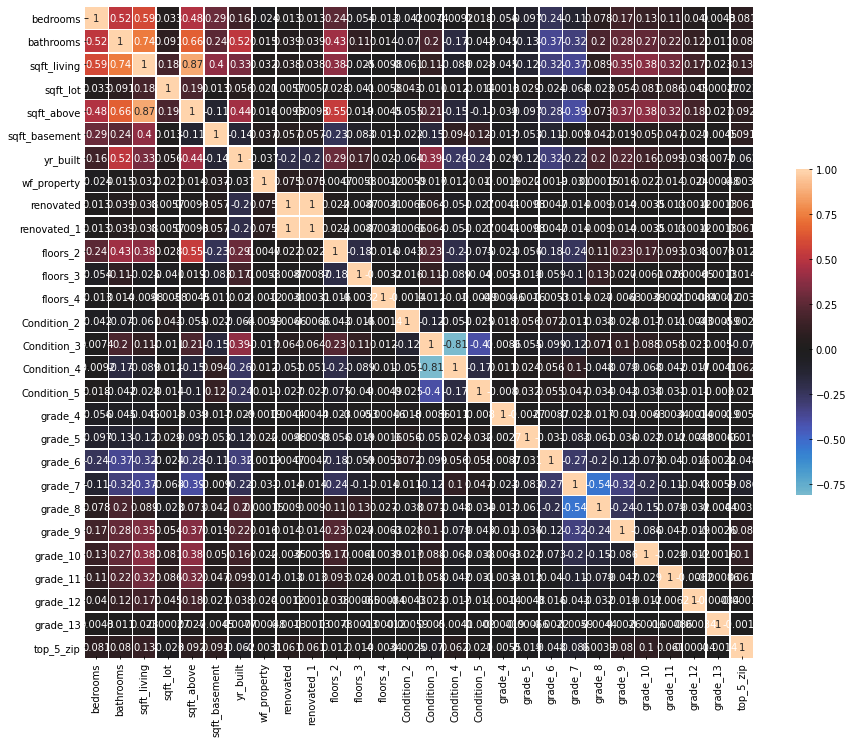

In [113]:
#heat map of correlation between features
corr = df_pred.corr()
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, center=0, linewidths=.5, annot=True, cbar_kws={"shrink": .5});

<b>Synopsis</b>

Looking at our heat map of correlations we see a few pairs of highly correlated features <br>(corr > .75):
 - sqft_living & bathrooms
 - sqft_living & sqft_above

# OLS Model 2
retest the data after removal of 'sqft_living'

In [114]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'wf_property',
       'renovated', 'Condition_2', 'Condition_3', 'Condition_4', 'Condition_5',
       'top_5_zip','floors_2','floors_3','floors_4','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1838.
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:51:55   Log-Likelihood:            -2.8328e+05
No. Observations:               21165   AIC:                         5.666e+05
Df Residuals:                   21138   BIC:                         5.668e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.348e+06    1.9e+05     28.129      0.000    4.97e+06    5.72e+06
bedrooms      -2.106e+04   1597.339    -13.186      0.000   -2.42e+04   -1.79e+04
bathrooms      3.892e+04   2589.018     15.033      0.000    3.38e+04     4.4e+04
sqft_lot         -0.0397      0.028     -1.405      0.160      -0.095       0.016
sqft_above      102.7559      2.843     36.144      0.000      97.183     108.328
sqft_basement   127.9654      3.391     37.739      0.000     121.319     134.612
yr_built      -2711.7015     52.975    -51.189      0.000   -2815.536   -2607.867
wf_property      4.1e+05   1.58e+04     25.947      0.000    3.79e+05    4.41e+05
renovated      2.083e+04   6354.936      3.278      0.001    8373.993    3.33e+04
Condition_2   -3.115e+04   3.59e+04     -0.867      0.386   -1.02e+05    3.93e+04
Condition_3    1.333e+04   3.37e+04      0.395      0.693   -5.28e+04    7.95e+04
Condition_4      1.8e+04   3.37e+04      0.533      0.594   -4.81e+04    8.41e+04
Condition_5    5.988e+04   3.39e+04      1.767      0.077   -6554.018    1.26e+05
top_5_zip      3.645e+05   5807.300     62.768      0.000    3.53e+05    3.76e+05
floors_2       2.396e+04   2912.602      8.225      0.000    1.82e+04    2.97e+04
floors_3       1.114e+05   6412.500     17.377      0.000    9.89e+04    1.24e+05
floors_4       1.197e+05   6.44e+04      1.860      0.063   -6466.766    2.46e+05
grade_4        1.023e+05   1.62e+05      0.630      0.529   -2.16e+05     4.2e+05
grade_5         4.66e+04   1.58e+05      0.295      0.768   -2.63e+05    3.56e+05
grade_6        8.139e+04   1.57e+05      0.517      0.605   -2.27e+05     3.9e+05
grade_7         1.62e+05   1.57e+05      1.029      0.303   -1.47e+05    4.71e+05
grade_8        2.591e+05   1.57e+05      1.646      0.100   -4.95e+04    5.68e+05
grade_9        4.097e+05   1.58e+05      2.601      0.009    1.01e+05    7.19e+05
grade_10        5.52e+05   1.58e+05      3.502      0.000    2.43e+05    8.61e+05
grade_11       6.959e+05   1.58e+05      4.408      0.000    3.86e+05    1.01e+06
grade_12       9.525e+05   1.59e+05      5.984      0.000     6.4e+05    1.26e+06
grade_13       1.285e+06   2.23e+05      5.769      0.000    8.49e+05    1.72e+06
==============================================================================
Omnibus:                     3114.811   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11587.613
Skew:                           0.713   Prob(JB):                         0.00
Kurtosis:                       6.332   Cond. No.                     2.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+07. T

<b>Synopsis</b>

After removing our collinear feature our confideence interval went down, while our warning still shows we might have strong multicollinearity.

In [115]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'wf_property',
       'renovated', 'Condition_2', 'Condition_3', 'Condition_4', 'Condition_5',
       'top_5_zip','floors_2','floors_3','floors_4','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']]
    
X_train, x_test, Y_train, y_test = train_test_split(X, df.price, test_size = 0.3)

linreg = LinearRegression() 
model_test = linreg.fit(X_train, Y_train)

#Use model to generate predicted values on both train and test sets
y_hat_train = model_test.predict(X_train)
y_hat_test = model_test.predict(x_test)

train_mse = mean_squared_error(Y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', train_mse)
print('Train RMSE:', math.sqrt(train_mse))
print('Test MSE:', test_mse)
print('Train RMSE:', math.sqrt(train_mse))

Train MSE: 24867540265.183514
Train RMSE: 157694.45223337287
Test MSE: 24267324286.36806
Train RMSE: 157694.45223337287


# Model 3
remove all features that had a p-value >0.05

In [130]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'yr_built', 'wf_property',
       'renovated', 'Condition_3', 'Condition_4', 'Condition_5',
       'top_5_zip','floors_2','floors_3','floors_4','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12','grade_13']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2275.
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:04:55   Log-Likelihood:            -2.8329e+05
No. Observations:               21165   AIC:                         5.666e+05
Df Residuals:                   21143   BIC:                         5.668e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.391e+06   1.03e+05     52.557      0.000    5.19e+06    5.59e+06
bedrooms      -2.084e+04   1591.230    -13.097      0.000    -2.4e+04   -1.77e+04
bathrooms      3.891e+04   2588.983     15.029      0.000    3.38e+04     4.4e+04
sqft_above      102.1365      2.795     36.549      0.000      96.659     107.614
sqft_basement   127.9216      3.385     37.786      0.000     121.286     134.557
yr_built      -2709.4815     52.956    -51.165      0.000   -2813.279   -2605.684
wf_property    4.091e+05   1.58e+04     25.894      0.000    3.78e+05     4.4e+05
renovated      2.103e+04   6354.742      3.310      0.001    8578.306    3.35e+04
Condition_3    4.323e+04   1.21e+04      3.573      0.000    1.95e+04     6.7e+04
Condition_4    4.771e+04   1.21e+04      3.929      0.000    2.39e+04    7.15e+04
Condition_5    8.945e+04   1.26e+04      7.109      0.000    6.48e+04    1.14e+05
top_5_zip      3.651e+05   5801.932     62.919      0.000    3.54e+05    3.76e+05
floors_2       2.425e+04   2903.936      8.352      0.000    1.86e+04    2.99e+04
floors_3       1.119e+05   6404.917     17.472      0.000    9.94e+04    1.24e+05
floors_4       1.202e+05   6.44e+04      1.868      0.062   -5923.322    2.46e+05
grade_7        8.357e+04   4066.160     20.552      0.000    7.56e+04    9.15e+04
grade_8        1.807e+05   4808.330     37.576      0.000    1.71e+05     1.9e+05
grade_9        3.313e+05   6089.873     54.394      0.000    3.19e+05    3.43e+05
grade_10       4.734e+05   7865.644     60.188      0.000    4.58e+05    4.89e+05
grade_11       6.171e+05   1.16e+04     53.036      0.000    5.94e+05     6.4e+05
grade_12        8.74e+05   2.35e+04     37.130      0.000    8.28e+05     9.2e+05
grade_13       1.208e+06   1.58e+05      7.664      0.000    8.99e+05    1.52e+06
==============================================================================
Omnibus:                     3112.808   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11582.904
Skew:                           0.713   Prob(JB):                         0.00
Kurtosis:                       6.332   Cond. No.                     3.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
X = df[['bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'yr_built', 'wf_property',
       'renovated', 'Condition_3', 'Condition_4', 'Condition_5',
       'top_5_zip','floors_2','floors_3','floors_4','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12']]
    
X_train, x_test, Y_train, y_test = train_test_split(X, df.price, test_size = 0.3)

linreg = LinearRegression() 
model_test = linreg.fit(X_train, Y_train)

#Use model to generate predicted values on both train and test sets
y_hat_train = model_test.predict(X_train)
y_hat_test = model_test.predict(x_test)

train_mse = mean_squared_error(Y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train MSE:', train_mse)
print('Train RMSE:', math.sqrt(train_mse))
print('Test MSE:', test_mse)
print('Train RMSE:', math.sqrt(train_mse))

Train MSE: 24990575555.09191
Train RMSE: 158084.07748755696
Test MSE: 24443493757.32433
Train RMSE: 158084.07748755696


In [175]:
#empty hashmap
featurecoef = {}
#print final model coef
for f,c in zip(X,linreg.coef_):
    featurecoef.update({f:round(c,2)})
    print(f'{f} : {c}')

bedrooms : -22301.36560786571
bathrooms : 42235.00985326621
sqft_above : 101.97040538487492
sqft_basement : 128.02342845543043
yr_built : -2740.391694948556
wf_property : 423751.69714258553
renovated : 20173.077056511866
Condition_3 : 36042.033811390815
Condition_4 : 39075.034707985345
Condition_5 : 84032.45051031481
top_5_zip : 374431.5722951031
floors_2 : 23144.783897801906
floors_3 : 113247.83909170044
floors_4 : 115516.30496438574
grade_7 : 81487.60222577905
grade_8 : 176491.8101750972
grade_9 : 330201.66357746825
grade_10 : 471061.3786548028
grade_11 : 605069.9405621226
grade_12 : 839371.1465269903


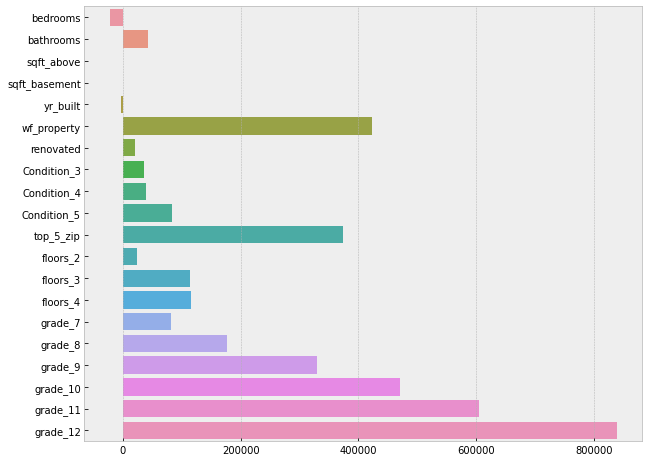

In [176]:
key = list(featurecoef.keys())
val = list(featurecoef.values())

#bar graph on feature coefficients
plt.figure(figsize=(10,8))
sns.barplot(val,key);